# **Quantum Algorithms**

## **Bernstein - Vazirani Algorithm**

##### *Simple Implementation*

Installation of necessary packages

In [ ]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 4.4 MB/s 
     |████████████████████████████████| 18.0 MB 309 kB/s 
     |████████████████████████████████| 240 kB 65.9 MB/s 
     |████████████████████████████████| 112 kB 57.2 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 943 kB 60.2 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 57.1 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 4.0 MB 35.1 MB/s 
     |████████████████████████████████| 112 kB 58.5 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.2-py3-none-any.whl size=12109 sha256=3a53c66bc1e1d74609c64d399eef83e0288148b70c37a8b3f47858c1c7d0fa30
  Stored in directory: /root/.cache/pip/wheels/e6/bd/f3/26c31

Installation and importing of libraries

In [ ]:
from qiskit import *

In [ ]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

Firstly, we choose a 7-bit secret number that we want to guess.

In [ ]:
secretNumber = '1000101'

We create a quantum circuit that has ( 7 + 1 = ) 8 qubits and 7 classical bits to measure them

In [ ]:
circuit = QuantumCircuit(8, 7)

1. We apply $h$ in all 7 qubits and $not$ for the helper qubit and then we apply $h$ on it.
2. We draw a barrier for better depiction.
3. We apply the $cnot$ (it flips the state) gate between the qubit that will have the value of 1 and the helper qubit. This is important because we want to have a qubit ordering of 1000101 so we need to flip the qubits that will have the value of 1. For now, this will be done manually in order to check that the algorithm works. Thus, we apply the $cnot$ in positions 0, 2 and 6.
4. We draw a barrier again.
5. We apply the $h$ in order to be able to measure them later.
6. Finally, we will measure those 7 qubits and we put their values in the 7 classical bits.

Note: If we didn't have the helper qubit, we would have a 50% chance of finding the secret number.
So, if we comment out the helper qubit and add more shots in the simulator, we will be able to see the 2 possible guesses.

In [ ]:
# Step 1
circuit.h([0, 1, 2, 3, 4, 5, 6])
circuit.x(7)
circuit.h(7)

# Step 2
circuit.barrier()

# Step 3
circuit.cx(6, 7)
circuit.cx(2, 7)
circuit.cx(0, 7)

# Step 4
circuit.barrier()

# Step 5
circuit.h([0, 1, 2, 3, 4, 5, 6])

# Step 6
circuit.measure([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6])

Now we can see our circuit by running the following cell.

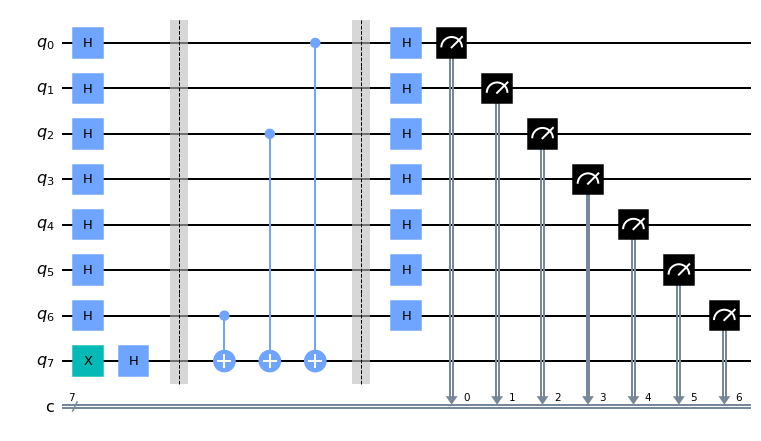

In [ ]:
circuit.draw(output='mpl')

In this cell, we run the circuit in the simulator. Also we can get the counts from this measurement.

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1000101': 1}
